### <center> Imported libraries
    

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import sklearn 
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier




In [2]:
data = pd.read_csv('C://Users//91900//OneDrive//Desktop//Data//emails.csv')

### <center> Loaded the Dataset 

In [3]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


### <center> EDA

In [4]:
duplicate = data[data.duplicated()]
duplicate

,text,spam
2155,Subject: research allocations to egm hi becky...,0
2260,Subject: departure of grant masson the resear...,0
2412,"Subject: re : schedule and more . . jinbaek ,...",0
2473,"Subject: day off tuesday stinson , i would l...",0
2763,"Subject: re : your mail zhendong , dr . kami...",0
3123,"Subject: re : grades pam , the students rese...",0
3152,Subject: tiger evals - attachment tiger hosts...,0
3248,"Subject: re : i am zhendong zhendong , thank...",0
3249,Subject: hello from enron dear dr . mcmullen ...,0
3387,"Subject: term paper dr . kaminski , attached...",0


In [5]:
data.shape


(5728, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
data.isna().sum()

text    0
spam    0
dtype: int64

In [8]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

C:\Users\91900\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

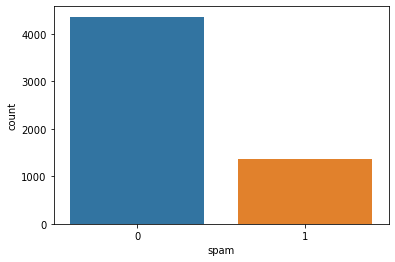

In [9]:
sns.countplot(data['spam'])

### <center> Preprocessing

In [10]:
#Function that tokenizes each and every email into words and returns it's length

def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [11]:
#Applying the function to df['text'] and storing the count in another column
data['count']=data['text'].apply(count_words)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91900\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
data['count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: count, Length: 5728, dtype: int64

In [13]:
data.groupby('spam')['count'].mean()

spam
0    346.835321
1    267.896199
Name: count, dtype: float64

In [14]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [15]:
data['text']=data['text'].apply(process_text)

In [16]:
#After cleaning the text. We will now carry out the process of Stemming to reduce infected words to their root
data['text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

In [17]:
stopword = set(stopwords.words('english'))
stopword.add('Subject')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,text,spam,count
0,naturally irresistible corporate identity lt r...,1,325
1,stock trading gunslinger fanny merrill muzo co...,1,90
2,unbelievable new homes made easy im wanting sh...,1,88
3,4 color printing special request additional in...,1,99
4,money get software cds software compatibility ...,1,53


In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [19]:
stemmer

<PorterStemmer>

In [20]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [21]:
data['text']=data['text'].apply(stemming)

In [22]:
data['text']

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       4 color printing special request additional in...
4       money get software cds software compatibility ...
                              ...                        
5723    research development charges gpg forwarded shi...
5724    receipts visit jim thanks invitation visit lsu...
5725    enron case study update wow day super thank mu...
5726    interest david please call shirley crenshaw as...
5727    news aurora 5 2 update aurora version 5 2 fast...
Name: text, Length: 5728, dtype: object

In [23]:

data.head()

,text,spam,count
0,naturally irresistible corporate identity lt r...,1,325
1,stock trading gunslinger fanny merrill muzo co...,1,90
2,unbelievable new homes made easy im wanting sh...,1,88
3,4 color printing special request additional in...,1,99
4,money get software cds software compatibility ...,1,53


In [24]:
spam = " ".join(data[data['spam'] == 1]['text'].tolist())
non_spam = " ".join(data[data['spam'] == 0]['text'].tolist())

### <center> Visualization of  Stopwords

In [25]:
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon
top_10_spam = return_top_words(spam,10)
top_10_non_spam = return_top_words(non_spam,10)

In [26]:
print(top_10_spam)
print(top_10_non_spam)

['com', '1', 'business', 'company', 'email', 'information', 'e', '5', 'money', '2']
['enron', 'ect', 'vince', 'hou', '2000', 'kaminski', 'com', 'please', 'subject', 'would']


In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

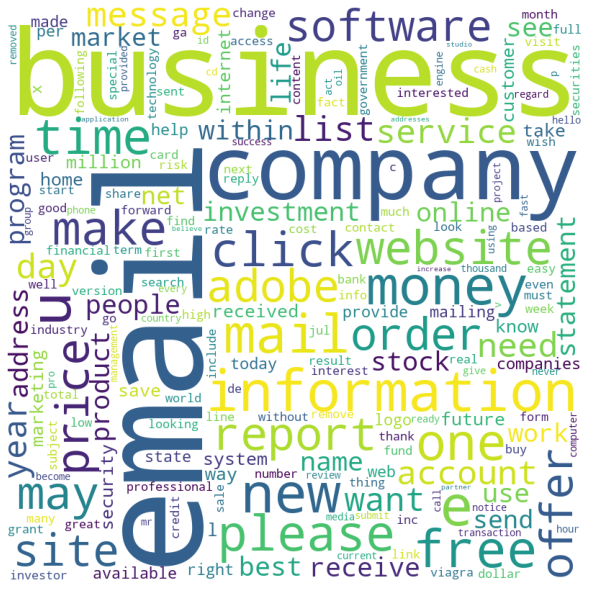

In [28]:
# Import package
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800, random_state=0,background_color="white", collocations=False,  stopwords = STOPWORDS).generate(spam)
# Plot
#plot_cloud(wordcloud)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

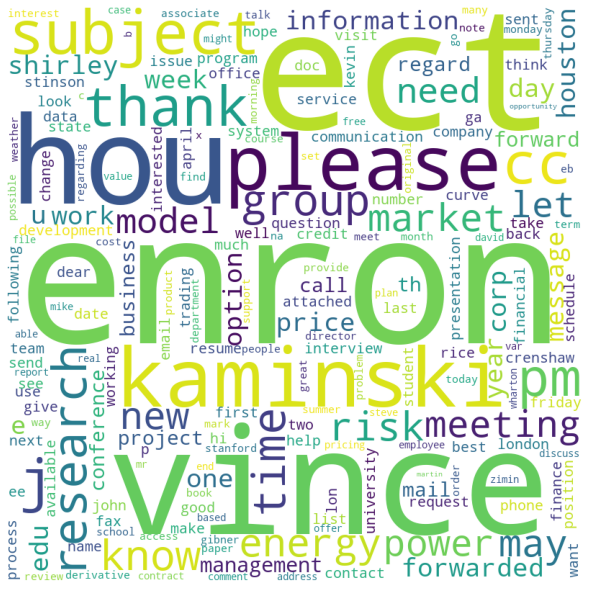

In [29]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='white',  collocations=False, stopwords = STOPWORDS).generate(non_spam)
# Plot
#plot_cloud(wordcloud)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### <center> Applying  the model's

In [30]:
X = data['text']
y = data['spam']

In [34]:
#TF-IDF
#Text feature extraction is the process of taking out a list of words from the text data and then transforming them into a feature set which is usable by a classifier. 
#This work emphasizes on the review of available feature extraction methods. 
#The following techniques can be used for extracting features from text data.
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_ct  = vectorizer.transform(X)
X_ct

<5728x37187 sparse matrix of type '<class 'numpy.float64'>'
	with 543952 stored elements in Compressed Sparse Row format>

In [35]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_ct,y,test_size=0.2,random_state=42)

In [36]:
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score is:  0.8891797556719022
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       856
           1       1.00      0.56      0.72       290

    accuracy                           0.89      1146
   macro avg       0.94      0.78      0.83      1146
weighted avg       0.90      0.89      0.88      1146



In [37]:
kfold = KFold(n_splits=5000,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,X_ct,data['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 92.43  %


In [38]:
#x_train is the training data set. y_train is the set of labels to all the data in x_train
#The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y. shape is (n,m) 
print(X_train.shape)
print(y_train.shape)

(4582, 37187)
(4582,)


In [39]:
print(X_test.shape)
print(y_test.shape)

(1146, 37187)
(1146,)


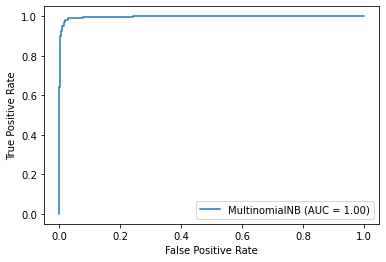

In [40]:
plot_roc_curve(nb,X_test,y_test)

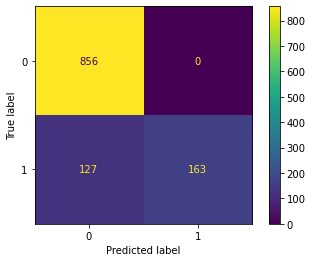

In [41]:
plot_confusion_matrix(nb,X_test,y_test)

In [42]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_pred1 = knn_classifier.predict(X_test)
print("accuracy_score is :",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy_score is : 0.974694589877836
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.98      0.92      0.95       290

    accuracy                           0.97      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.97      0.97      0.97      1146



In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

accuracy score is:  0.9720767888307156
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.89      0.94       290

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



In [44]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred4 = xg.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

C:\Users\91900\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score is:  0.9842931937172775
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.96      0.98      0.97       290

    accuracy                           0.98      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.98      0.98      0.98      1146

